In [1]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 1.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd 
import numpy as np
from catboost import CatBoostRegressor, FeaturesData, Pool
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [3]:
sns.__version__

'0.11.0'

In [4]:
df = pd.read_csv("../input/seatlle-airbnb/price_train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

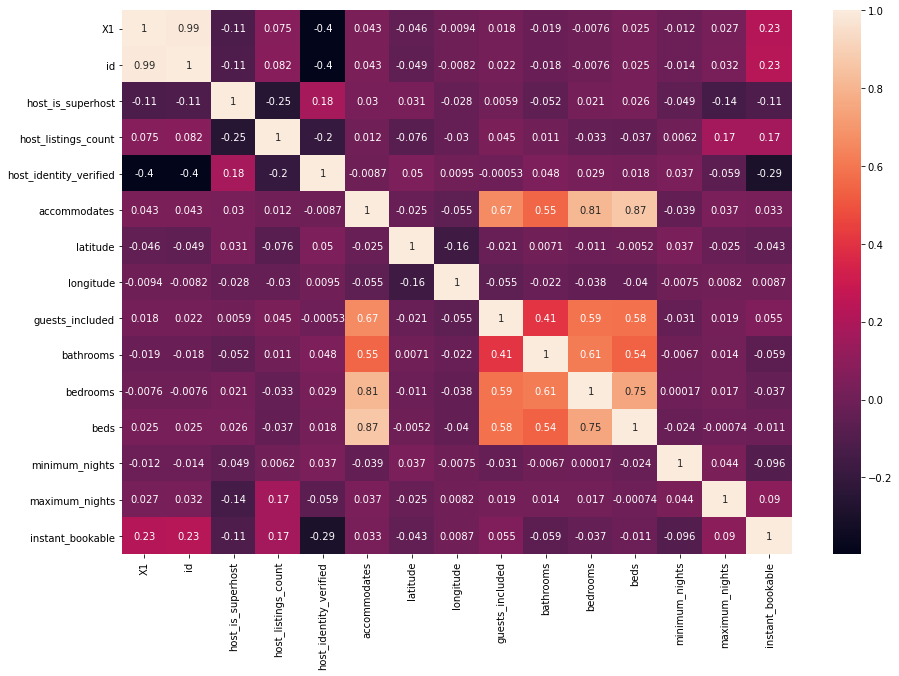

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

In [7]:
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [8]:
test = pd.read_csv("../input/seatlle-airbnb/price_test.csv")

In [9]:
test

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4349,19350610,False,92%,within an hour,51,True,3,University District,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",$60.00,2,1125,False,moderate
1730,1580,7886656,True,100%,within an hour,2,True,4,West Seattle,Apartment,...,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$50.00,2,29,True,moderate
1731,679,3535171,True,100%,within an hour,2,True,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Pets live on this property""...",$25.00,1,29,False,strict_14_with_grace_period
1732,7360,27930170,False,100%,within an hour,1,False,4,Central Area,Guest suite,...,1.0,1,2,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Free...",$75.00,3,1125,True,strict_14_with_grace_period


preprocessing Price Column

In [10]:
df['price'] = df['price'].str.replace("$", ""); df['price'] = df['price'].str.replace(",", ""); df['price'] = df['price'].astype(float)

In [11]:
df

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,279.0
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,99.0
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,75.0
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,70.0
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5550,22208755,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",$129.00,2,1125,True,strict,350.0
3462,7391,28049926,False,100%,within an hour,123,False,1,Capitol Hill,House,...,1,1,Real Bed,"{Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...",$15.00,1,21,True,strict_14_with_grace_period,30.0
3463,6056,23567364,True,100%,within an hour,4,False,2,Other neighborhoods,House,...,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Pets...",$22.00,2,30,True,flexible,30.0
3464,1277,6728419,True,100%,within a few hours,1,False,2,Other neighborhoods,Guest suite,...,1,1,Real Bed,"{TV,Wifi,""Free parking on premises"",""Indoor fi...",$25.00,1,1125,False,flexible,95.0


In [12]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [13]:
host_response_time = encoder.fit_transform(df['host_response_time'])

host_response_time 

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

Drop "id" & "price" columns from the df to generate X

In [14]:
X = df.drop(['X1', 'id', 'price'], axis =1)

In [15]:
X.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [16]:
print("Number of Features -> ", len(X.columns))

Number of Features ->  22


In [17]:
X.isna().sum()

host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
dtype: int64

No missing values in the dataset.

In [18]:
y = df[['price']]

In [19]:
y

,price
0,279.0
1,99.0
2,75.0
3,70.0
4,242.0
...,...
3461,350.0
3462,30.0
3463,30.0
3464,95.0


In [20]:
y.isna().sum()

price    0
dtype: int64

No missing values for prices.

### Feature Wise Preprocessing & Analysis

##### Preliminary Feature Processing

In [21]:
X['host_is_superhost'] =X['host_is_superhost'].apply(lambda x : 0 if x == False else 1)  

In [22]:
X['host_is_superhost']

0       0
1       1
2       1
3       1
4       1
       ..
3461    0
3462    0
3463    1
3464    1
3465    0
Name: host_is_superhost, Length: 3466, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


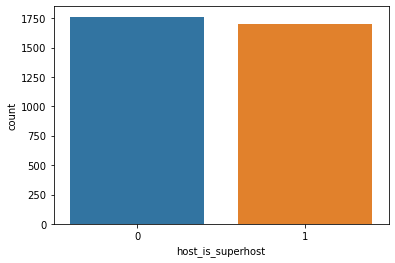

In [23]:
sns.countplot(X['host_is_superhost'])

Conclusion : In the dataset, there is an equal distribution of host being a super host and host not being a super host. 

Preprocessing "host_response_rate" to generate numeric value

In [24]:
X['host_response_rate'] = X['host_response_rate'].str.replace("%", "")
X['host_response_rate'] = X['host_response_rate'].astype(float) / 100.0

In [25]:
X

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,0,0.99,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,...,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict
1,1,1.00,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,...,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate
2,1,1.00,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,...,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate
3,1,0.90,within a few hours,1,True,2,Central Area,House,Private room,47.601922,...,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible
4,1,1.00,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,...,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,0,0.99,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.610532,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",$129.00,2,1125,True,strict
3462,0,1.00,within an hour,123,False,1,Capitol Hill,House,Shared room,47.642069,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...",$15.00,1,21,True,strict_14_with_grace_period
3463,1,1.00,within an hour,4,False,2,Other neighborhoods,House,Private room,47.716853,...,2.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Pets...",$22.00,2,30,True,flexible
3464,1,1.00,within a few hours,1,False,2,Other neighborhoods,Guest suite,Entire home/apt,47.672343,...,1.0,1,1,Real Bed,"{TV,Wifi,""Free parking on premises"",""Indoor fi...",$25.00,1,1125,False,flexible


Preprocess "host_identity_verified" to generate numeric column type

In [26]:
X["host_identity_verified"] = X["host_identity_verified"].apply(lambda x: 0 if x == False else 1)

In [27]:
encoder = LabelBinarizer()
neighbor_grp_cleansed = encoder.fit_transform(X['neighbourhood_group_cleansed'])
neighbor_grp_cleansed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X['neighbourhood_group_cleansed'].value_counts()

Downtown               652
Other neighborhoods    631
Capitol Hill           393
Central Area           292
Queen Anne             241
Ballard                190
West Seattle           182
Rainier Valley         156
Cascade                144
Beacon Hill            141
University District     98
Delridge                95
Northgate               81
Magnolia                68
Lake City               55
Seward Park             38
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [29]:
len(X.columns)

22

Preprocess "cleaning_fee" to generate numeric column type

In [30]:
X['cleaning_fee'] = X['cleaning_fee'].str.replace("$", "")

In [31]:
X['cleaning_fee'] = X['cleaning_fee'].str.replace(",", "")


In [32]:
X['cleaning_fee'] = X['cleaning_fee'].astype(float)

In [33]:
X.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [34]:
X['host_is_superhost']

0       0
1       1
2       1
3       1
4       1
       ..
3461    0
3462    0
3463    1
3464    1
3465    0
Name: host_is_superhost, Length: 3466, dtype: int64

In [35]:
X['host_response_rate']

0       0.99
1       1.00
2       1.00
3       0.90
4       1.00
        ... 
3461    0.99
3462    1.00
3463    1.00
3464    1.00
3465    1.00
Name: host_response_rate, Length: 3466, dtype: float64

In [36]:
X['host_response_rate'].value_counts()

1.00    2813
0.99     318
0.92      41
0.98      39
0.90      39
0.00      26
0.97      20
0.95      18
0.50      14
0.96      14
0.86      14
0.80      13
0.94      13
0.75      12
0.67      10
0.88       8
0.85       8
0.93       8
0.83       7
0.78       5
0.89       5
0.70       5
0.91       3
0.56       3
0.84       2
0.60       2
0.71       1
0.33       1
0.87       1
0.57       1
0.62       1
0.40       1
Name: host_response_rate, dtype: int64

In [37]:
X['host_response_rate'].corr(df['price'])

0.014550079491735524

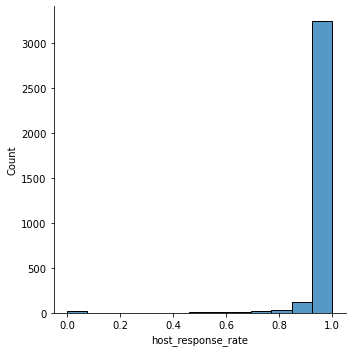

In [38]:
sns.displot(X['host_response_rate'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


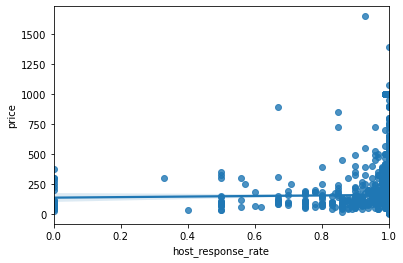

In [39]:
sns.regplot(X['host_response_rate'], df['price'])

Conclusion : 

1. Majority of the listings have response rate as 1.0

2. It doesn't affect the price directly

because if response_rate is 0, it would eventually be listed out. However, few of the listings had response rate as 0. Let's explore those few responses.

In [40]:
X[X['host_response_rate'] == 0]

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
103,0,0.0,a few days or more,1,0,4,Capitol Hill,Apartment,Entire home/apt,47.615679,...,2.0,2,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",60.0,1,365,False,strict_14_with_grace_period
205,1,0.0,a few days or more,1,1,2,Ballard,Townhouse,Private room,47.670366,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",15.0,3,1125,False,flexible
356,0,0.0,a few days or more,1,1,3,Other neighborhoods,Apartment,Entire home/apt,47.677514,...,1.0,1,2,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",45.0,2,7,False,strict_14_with_grace_period
387,0,0.0,a few days or more,3,1,2,Rainier Valley,House,Private room,47.568560,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",0.0,1,1125,True,moderate
429,0,0.0,a few days or more,1,0,2,Downtown,Apartment,Entire home/apt,47.618085,...,1.0,1,2,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",G...",50.0,3,1125,True,strict_14_with_grace_period
520,0,0.0,a few days or more,1,0,2,Other neighborhoods,Apartment,Entire home/apt,47.675104,...,1.0,0,1,Real Bed,"{TV,Wifi,""Air conditioning"",""Free parking on p...",50.0,5,15,False,flexible
709,0,0.0,a few days or more,4,1,4,University District,House,Entire home/apt,47.668194,...,1.0,2,3,Real Bed,"{Wifi,Kitchen,Dog(s),Cat(s),""Free street parki...",100.0,2,1125,False,moderate
783,0,0.0,a few days or more,4,1,2,University District,House,Private room,47.669393,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free street parking"",""Indoor fi...",75.0,2,1125,False,moderate
954,0,0.0,a few days or more,1,1,2,Other neighborhoods,Apartment,Entire home/apt,47.677966,...,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,Elevator,""Free street parking...",50.0,3,90,True,moderate
1323,0,0.0,a few days or more,1,0,6,West Seattle,House,Entire home/apt,47.572893,...,2.5,3,4,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",150.0,2,1125,False,strict_14_with_grace_period


We can say, those with 0 response_rate have listings count as 1 (majorly). 
We can also say, those are intended for long term bookings.

In [41]:
# to be settled

X['host_response_time']

0           within an hour
1           within an hour
2           within an hour
3       within a few hours
4           within an hour
               ...        
3461        within an hour
3462        within an hour
3463        within an hour
3464    within a few hours
3465        within an hour
Name: host_response_time, Length: 3466, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


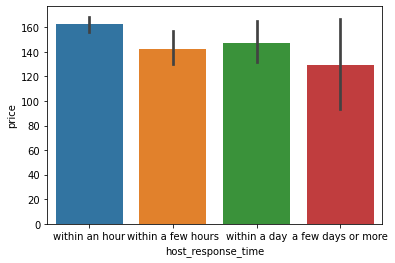

In [42]:
sns.barplot(X['host_response_time'], df['price'])

We can conclude that orders which are responded within an hour, are the costliest ones.

As per NyTimes, A superhost maintains a quick response rate. Let's verify with the data.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


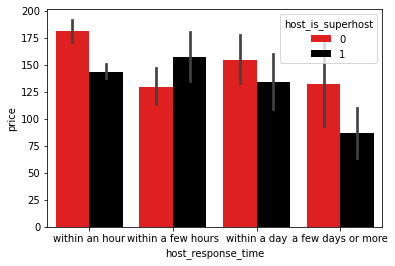

In [43]:
sns.barplot(X['host_response_time'], df['price'], hue = X['host_is_superhost'], palette = ['r','k'])
plt.show()

Observation: If the host is not a superhost, the response time is faster.

Conclusion: 
1. If the host is a normal host, the number of requests must be low compared to the superhost, which is resulting in faster response time compared to superhosts.
2. There might be listings which want to fulfill the criteria of becoming a superhost. And to achieve this feat, they are outperforming in the response time field.

In [44]:
# to be settled, feature scaling

X['host_listings_count']

0       521
1         1
2         1
3         1
4         4
       ... 
3461    521
3462    123
3463      4
3464      1
3465      2
Name: host_listings_count, Length: 3466, dtype: int64

In [45]:
X['host_listings_count'].corr(df['price'])

0.5390158388541119

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


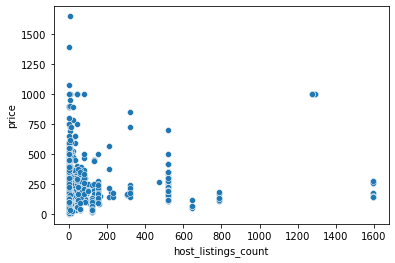

In [46]:
sns.scatterplot(X['host_listings_count'], df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


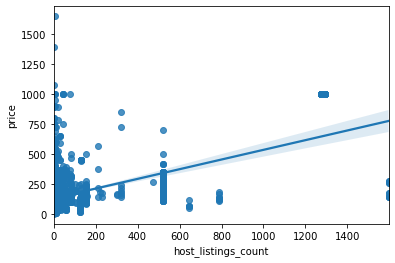

In [47]:
sns.regplot(X['host_listings_count'], df['price'])

Conclusion : Higher the listings count, higher the price as expected. 

In [48]:
X['host_identity_verified']

0       0
1       1
2       0
3       1
4       1
       ..
3461    0
3462    0
3463    0
3464    0
3465    0
Name: host_identity_verified, Length: 3466, dtype: int64

In [49]:
X['host_identity_verified'].corr(df['price'])

-0.12069300649889476

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


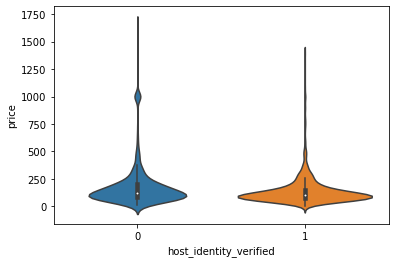

In [50]:
sns.violinplot(X['host_identity_verified'], df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


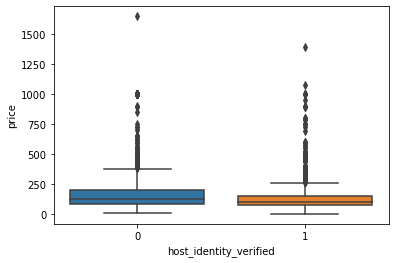

In [51]:
sns.boxplot(X['host_identity_verified'], df['price'])

We can confirm that, host_identity verification doesn't make any difference to the price.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


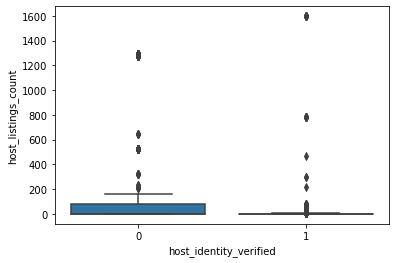

In [52]:
sns.boxplot(X['host_identity_verified'], X['host_listings_count'])

But, with a verified identity, higher listings count can be achieved.

In [53]:
# to be settled

X['accommodates']

0       5
1       2
2       4
3       2
4       8
       ..
3461    5
3462    1
3463    2
3464    2
3465    2
Name: accommodates, Length: 3466, dtype: int64

In [54]:
X['accommodates'].value_counts()

2     1268
4      700
3      460
6      355
5      195
1      166
8      128
7       55
10      42
12      28
9       26
16      19
11       7
14       7
13       5
15       2
23       1
28       1
25       1
Name: accommodates, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


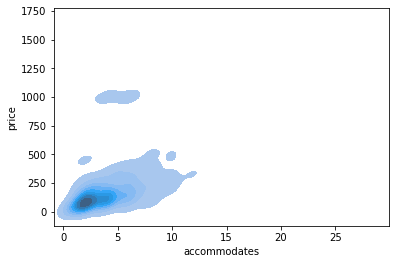

In [55]:
sns.kdeplot(X['accommodates'], df['price'], shade = True)

Conclusion : There is a obvious & direct relation between the accommodates & the price (few being outliers because of other factors or fascilities causing their price to increase). 

In [56]:
# to be settled

X['neighbourhood_group_cleansed']

0                  Downtown
1                Queen Anne
2            Rainier Valley
3              Central Area
4               Beacon Hill
               ...         
3461               Downtown
3462           Capitol Hill
3463    Other neighborhoods
3464    Other neighborhoods
3465         Rainier Valley
Name: neighbourhood_group_cleansed, Length: 3466, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


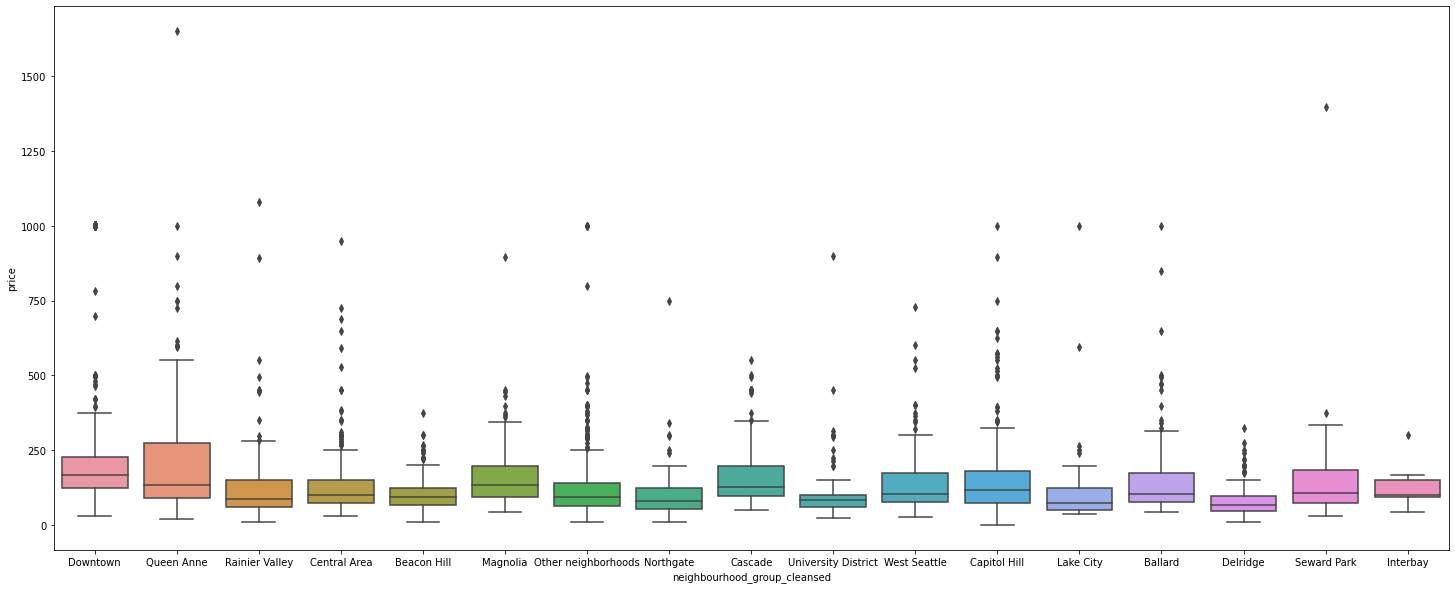

In [57]:
plt.figure(figsize = (25,10))
sns.boxplot(X['neighbourhood_group_cleansed'], df['price'])

Conclusion : Queen Anne being affluent neighbourhood is the costliest.

In [58]:
X['property_type']

0         Apartment
1             House
2       Guest suite
3             House
4             House
           ...     
3461      Apartment
3462          House
3463          House
3464    Guest suite
3465        Cottage
Name: property_type, Length: 3466, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


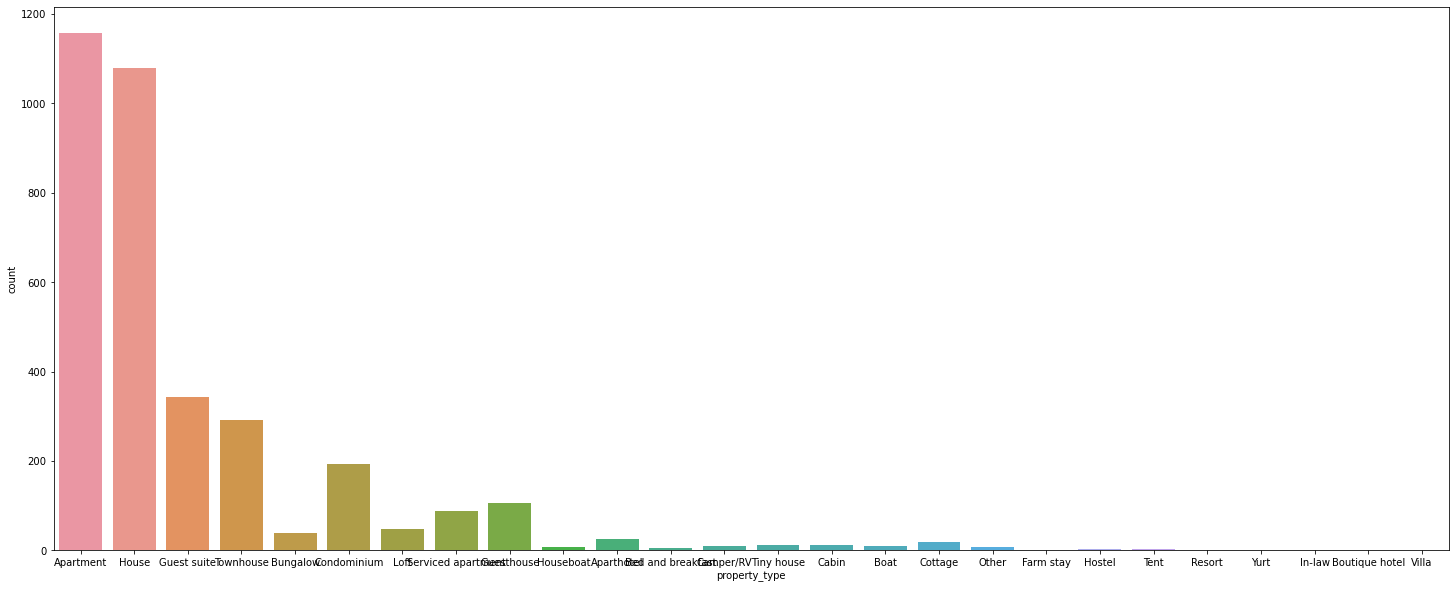

In [59]:
plt.figure(figsize = (25,10))
sns.countplot(X['property_type'])

Observation : Apertment, House & Guest Suite are the most common property types. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


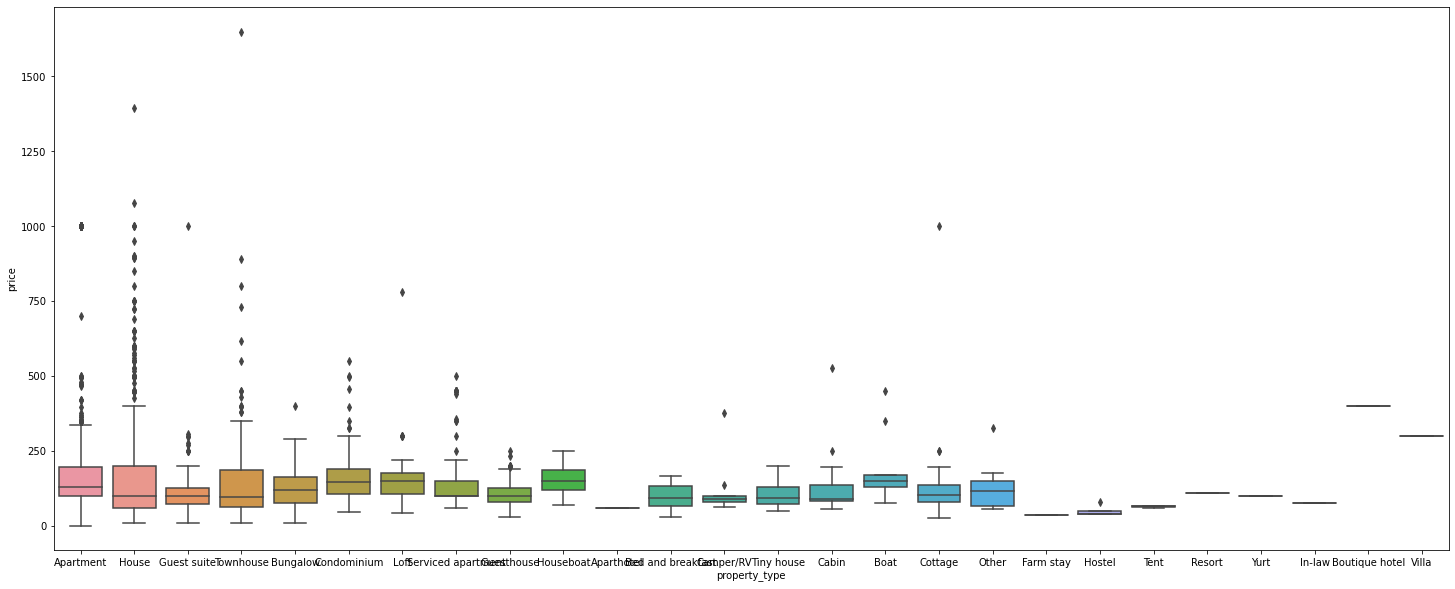

In [60]:
plt.figure(figsize = (25,10))
sns.boxplot(X['property_type'], df['price'])

Conclusion : Boutique Hotel & Villa have the highest mean price in the property type.

In [61]:
# to be settled

X['room_type']

0       Entire home/apt
1       Entire home/apt
2       Entire home/apt
3          Private room
4       Entire home/apt
             ...       
3461    Entire home/apt
3462        Shared room
3463       Private room
3464    Entire home/apt
3465    Entire home/apt
Name: room_type, Length: 3466, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


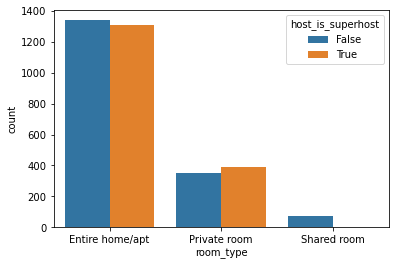

In [62]:
## Let's explore the room type distribution

sns.countplot(X['room_type'], hue = df['host_is_superhost'])
plt.show()

Conclusion: 

Majority of the listings are for Enitre home/apt.

Among the listings, there is an equal distribution for host being superhost.

No Superhost for shared room which should be obvious.

In [63]:
# to be settled

X['latitude']

0       47.612163
1       47.640827
2       47.549007
3       47.601922
4       47.552311
          ...    
3461    47.610532
3462    47.642069
3463    47.716853
3464    47.672343
3465    47.557571
Name: latitude, Length: 3466, dtype: float64

In [64]:
# to be settled

X['longitude']

0      -122.338239
1      -122.355248
2      -122.273951
3      -122.307979
4      -122.293409
           ...    
3461   -122.342332
3462   -122.304120
3463   -122.353945
3464   -122.283291
3465   -122.281461
Name: longitude, Length: 3466, dtype: float64

Drop 'latitude' & 'longitude' as these are redundant features compared to 'neighbourhood_group'.
Added to it, coordinates aren't the best indicators of price as compared to neighbourhood.

In [65]:
X.drop(['latitude', 'longitude'], axis = 1, inplace = True)

In [66]:
test.drop(['latitude', 'longitude'], axis = 1, inplace = True)

In [67]:
# to be feature scaled

X['guests_included']

0       4
1       1
2       2
3       1
4       6
       ..
3461    4
3462    1
3463    1
3464    1
3465    2
Name: guests_included, Length: 3466, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


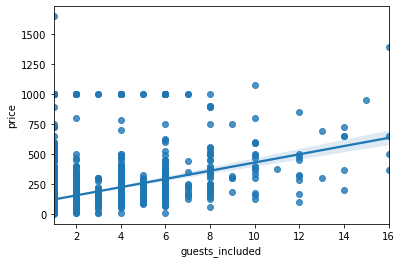

In [68]:
sns.regplot(X['guests_included'], df['price'])

Conclusion : With increasing number of guests_included, the price increases proportionately. Number of guests_included has a direct impact on the price of the listing.

In [69]:
# to be feature scaled

X['bathrooms']

0       2.0
1       1.0
2       1.0
3       1.0
4       2.5
       ... 
3461    1.0
3462    1.0
3463    2.0
3464    1.0
3465    1.0
Name: bathrooms, Length: 3466, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


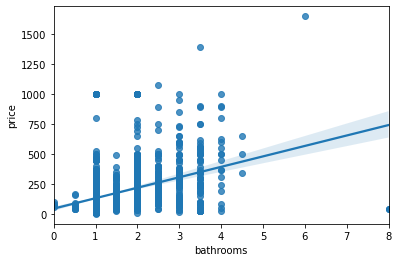

In [70]:
sns.regplot(X['bathrooms'], df['price'])

Conclusion : With increasing number of bathrooms, the price increases.

In [71]:
# to be feature scaled

X['bedrooms']

0       2
1       0
2       1
3       1
4       3
       ..
3461    2
3462    1
3463    1
3464    1
3465    1
Name: bedrooms, Length: 3466, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


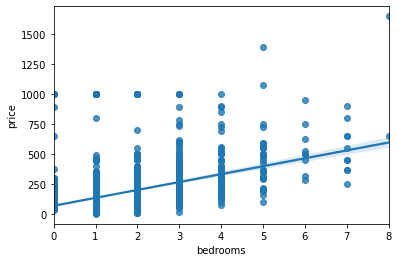

In [72]:
sns.regplot(X['bedrooms'], df['price'])

Conclusion : With increasing number of bedrooms, the price increases.

In [73]:
# to be settled, feature scaled

X['beds']

0       2
1       1
2       2
3       1
4       3
       ..
3461    2
3462    1
3463    1
3464    1
3465    1
Name: beds, Length: 3466, dtype: int64

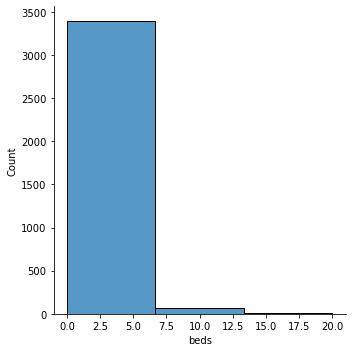

In [74]:
sns.displot(X['beds'], bins = 3)

Observation : Most of the bookings which happen, comprise of at max 6 beds.

In [75]:
X['beds'].value_counts()

1     1748
2      879
3      409
4      188
5       96
6       48
0       28
7       28
8       18
10       8
9        4
11       3
12       3
15       2
14       1
13       1
20       1
16       1
Name: beds, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


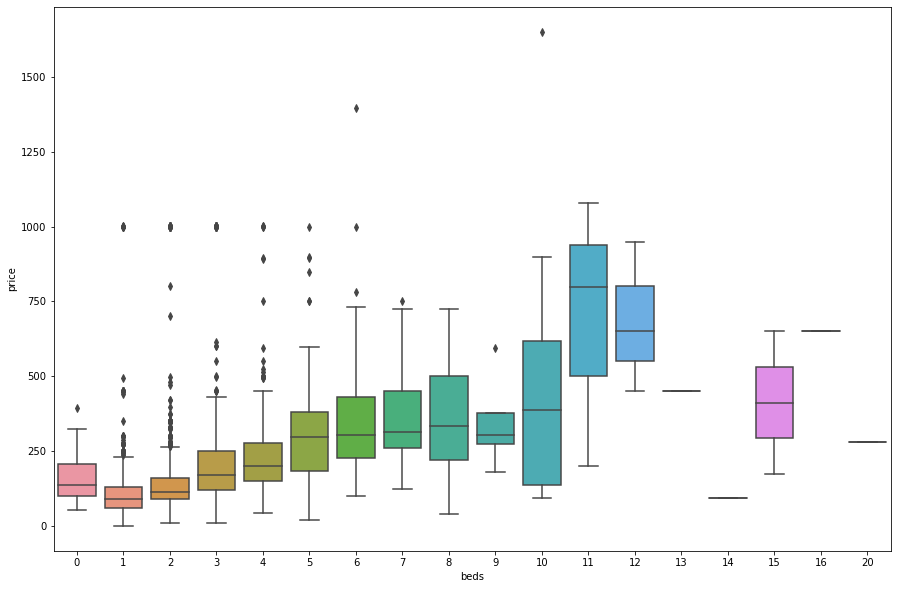

In [76]:
plt.figure(figsize = (15,10))
sns.boxplot(X['beds'], df['price'])
plt.show()

Conclusion : As expected, with the increasing number of beds, the price would increase.
More beds mean, more space needed. Hence, higher price charged.

Another observation, there are no aberrations for number of beds greater than 6. This can explained by the fact that the most common bookings which happen are the ones for number of beds lesser than 6. Those have additional features which increase their price.

In [77]:
# to be settled

X['bed_type']

0       Real Bed
1       Real Bed
2       Real Bed
3       Real Bed
4       Real Bed
          ...   
3461    Real Bed
3462    Real Bed
3463    Real Bed
3464    Real Bed
3465    Real Bed
Name: bed_type, Length: 3466, dtype: object

In [78]:
X['bed_type'].value_counts()

Real Bed         3421
Futon              23
Pull-out Sofa      16
Airbed              6
Name: bed_type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


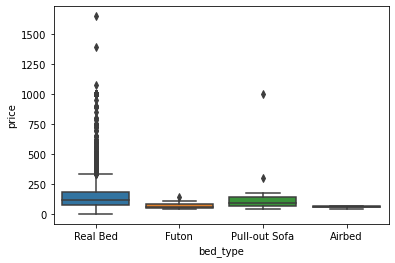

In [79]:
sns.boxplot(X['bed_type'] , df['price'])

Conclusion: With the bed type, the price increases. Real bed are the costliest among all as expected.

In [80]:
X['amenities']


0       {TV,Internet,Wifi,Kitchen,Elevator,Heating,"Fa...
1       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2       {TV,Wifi,"Air conditioning",Kitchen,"Free stre...
3       {Internet,Wifi,Kitchen,"Pets live on this prop...
4       {TV,Wifi,Kitchen,"Free parking on premises","S...
                              ...                        
3461    {TV,Internet,Wifi,"Air conditioning",Kitchen,G...
3462    {Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...
3463    {Wifi,Kitchen,"Free parking on premises","Pets...
3464    {TV,Wifi,"Free parking on premises","Indoor fi...
3465    {Wifi,Kitchen,"Free street parking",Heating,"S...
Name: amenities, Length: 3466, dtype: object

A little text cleaning

In [81]:
X['amenities'] = X['amenities'].str.replace("[{}]", "")
X['amenities']

0       TV,Internet,Wifi,Kitchen,Elevator,Heating,"Fam...
1       TV,"Cable TV",Internet,Wifi,"Air conditioning"...
2       TV,Wifi,"Air conditioning",Kitchen,"Free stree...
3       Internet,Wifi,Kitchen,"Pets live on this prope...
4       TV,Wifi,Kitchen,"Free parking on premises","Sm...
                              ...                        
3461    TV,Internet,Wifi,"Air conditioning",Kitchen,Gy...
3462    Wifi,Kitchen,Heating,Essentials,Shampoo,Hanger...
3463    Wifi,Kitchen,"Free parking on premises","Pets ...
3464    TV,Wifi,"Free parking on premises","Indoor fir...
3465    Wifi,Kitchen,"Free street parking",Heating,"Sm...
Name: amenities, Length: 3466, dtype: object

In [82]:
X['amenities'] = X['amenities'].str.replace('[""]', "")
X['amenities']

0       TV,Internet,Wifi,Kitchen,Elevator,Heating,Fami...
1       TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2       TV,Wifi,Air conditioning,Kitchen,Free street p...
3       Internet,Wifi,Kitchen,Pets live on this proper...
4       TV,Wifi,Kitchen,Free parking on premises,Smoki...
                              ...                        
3461    TV,Internet,Wifi,Air conditioning,Kitchen,Gym,...
3462    Wifi,Kitchen,Heating,Essentials,Shampoo,Hanger...
3463    Wifi,Kitchen,Free parking on premises,Pets liv...
3464    TV,Wifi,Free parking on premises,Indoor firepl...
3465    Wifi,Kitchen,Free street parking,Heating,Smoke...
Name: amenities, Length: 3466, dtype: object

Most popular amenities

In [83]:
amenities = np.unique(np.concatenate(X['amenities'].map(lambda x : x.split(","))))
amenities

array(['', ' toilet', '24-hour check-in', 'Accessible-height bed',
       'Accessible-height toilet', 'Air conditioning', 'Amazon Echo',
       'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Balcony', 'Bath towel',
       'Bathroom essentials', 'Bathtub', 'Bathtub with bath chair',
       'Beach essentials', 'Beach view', 'Beachfront', 'Bed linens',
       'Bedroom comforts', 'Body soap', 'Breakfast', 'Breakfast table',
       'Building staff', 'Buzzer/wireless intercom', 'Cable TV',
       'Carbon monoxide detector', 'Cat(s)', 'Ceiling fan',
       'Central air conditioning', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Convection oven',
       'Cooking basics', 'Crib', 'DVD player', 'Day bed',
       'Disabled parking spot', 'Dishes and silverware', 'Dishwasher',
       'Dog(s)', 'Doorman', 'Dryer', 'EV charger',
       'Electric profiling bed', 'Elevator', 'En suite

In [84]:
X.iloc[0]['amenities']

'TV,Internet,Wifi,Kitchen,Elevator,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Smart lock,Keypad,Private living room'

In [85]:
amenities = amenities[1:][:-2]
amenities

array([' toilet', '24-hour check-in', 'Accessible-height bed',
       'Accessible-height toilet', 'Air conditioning', 'Amazon Echo',
       'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Balcony', 'Bath towel',
       'Bathroom essentials', 'Bathtub', 'Bathtub with bath chair',
       'Beach essentials', 'Beach view', 'Beachfront', 'Bed linens',
       'Bedroom comforts', 'Body soap', 'Breakfast', 'Breakfast table',
       'Building staff', 'Buzzer/wireless intercom', 'Cable TV',
       'Carbon monoxide detector', 'Cat(s)', 'Ceiling fan',
       'Central air conditioning', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Convection oven',
       'Cooking basics', 'Crib', 'DVD player', 'Day bed',
       'Disabled parking spot', 'Dishes and silverware', 'Dishwasher',
       'Dog(s)', 'Doorman', 'Dryer', 'EV charger',
       'Electric profiling bed', 'Elevator', 'En suite bat

In [86]:
amenities = [x.strip() for x in amenities]

In [87]:
amenities

['toilet',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet connecti

We'll have to make features of boolean type depicting has or has not for an amenity. 

In [88]:
for amenity in amenities : 
    X["has_" + amenity] = X['amenities'].apply(lambda x : int(amenity in x))

In [89]:
X

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,guests_included,...,has_Well-lit path to entrance,has_Wheelchair accessible,has_Wide clearance to bed,has_Wide clearance to shower,has_Wide doorway,has_Wide entryway,has_Wide hallway clearance,has_Wifi,has_Window guards,has_Wine cooler
0,0,0.99,within an hour,521,0,5,Downtown,Apartment,Entire home/apt,4,...,0,0,0,0,0,0,0,1,0,0
1,1,1.00,within an hour,1,1,2,Queen Anne,House,Entire home/apt,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1.00,within an hour,1,0,4,Rainier Valley,Guest suite,Entire home/apt,2,...,0,0,0,0,0,0,0,1,0,0
3,1,0.90,within a few hours,1,1,2,Central Area,House,Private room,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1.00,within an hour,4,1,8,Beacon Hill,House,Entire home/apt,6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,0,0.99,within an hour,521,0,5,Downtown,Apartment,Entire home/apt,4,...,0,0,0,0,0,0,0,1,0,0
3462,0,1.00,within an hour,123,0,1,Capitol Hill,House,Shared room,1,...,0,0,0,0,0,0,0,1,0,0
3463,1,1.00,within an hour,4,0,2,Other neighborhoods,House,Private room,1,...,0,0,0,0,0,0,0,1,0,0
3464,1,1.00,within a few hours,1,0,2,Other neighborhoods,Guest suite,Entire home/apt,1,...,0,0,0,0,0,0,0,1,0,0


Drop the amenities from X

In [90]:
X.drop(['amenities'], axis = 1, inplace = True)

Similarly for test dataset,

In [91]:
for amenity in amenities : 
    test["has_" + amenity] = test['amenities'].apply(lambda x : int(amenity in x))

In [92]:
test

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,has_Well-lit path to entrance,has_Wheelchair accessible,has_Wide clearance to bed,has_Wide clearance to shower,has_Wide doorway,has_Wide entryway,has_Wide hallway clearance,has_Wifi,has_Window guards,has_Wine cooler
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,0,0,0,0,0,0,0,1,0,0
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,0,0,0,0,0,0,0,1,0,0
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,0,0,0,0,0,0,0,1,0,0
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,0,0,0,0,0,0,0,1,0,0
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4349,19350610,False,92%,within an hour,51,True,3,University District,Apartment,...,0,0,0,0,0,0,0,1,0,0
1730,1580,7886656,True,100%,within an hour,2,True,4,West Seattle,Apartment,...,0,1,0,0,0,0,0,1,0,0
1731,679,3535171,True,100%,within an hour,2,True,2,Other neighborhoods,House,...,0,0,0,0,0,0,0,1,0,0
1732,7360,27930170,False,100%,within an hour,1,False,4,Central Area,Guest suite,...,0,0,0,0,0,0,0,1,0,0


In [93]:
test.drop(['amenities'], axis = 1, inplace = True)

In [94]:
# feature scaling

X['cleaning_fee']

0       129.0
1        50.0
2        25.0
3         0.0
4        99.0
        ...  
3461    129.0
3462     15.0
3463     22.0
3464     25.0
3465     59.0
Name: cleaning_fee, Length: 3466, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


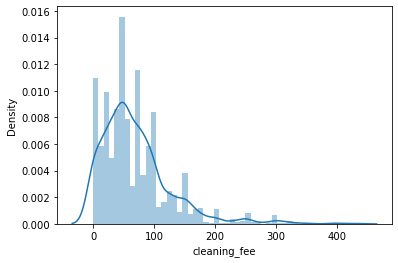

In [95]:
sns.distplot(X['cleaning_fee'])

A huge chunk of price lies in the range of 50 to 100 for cleaning. 

For a small fraction, it is 200 to 400. Let's see if that higher cleaning_fee is related to higher price. Intutively, it should be.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


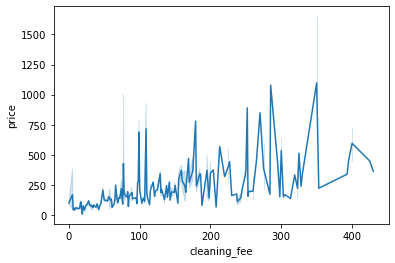

In [96]:
sns.lineplot(X['cleaning_fee'], df['price'])

Conclusion : Although there are some spikes in between (aberrations), we can say there's a linear increase of price with the cleaning_fee.

In [97]:
# feature scaling 

X['minimum_nights']

0       2
1       2
2       2
3       2
4       2
       ..
3461    2
3462    1
3463    2
3464    1
3465    3
Name: minimum_nights, Length: 3466, dtype: int64

In [98]:
X['minimum_nights'].value_counts()

2      1481
1      1263
3       381
4        87
30       75
5        56
7        33
10       15
6        12
21       12
28       11
14        7
29        5
90        4
180       4
25        4
20        3
11        2
8         2
39        1
60        1
182       1
18        1
16        1
330       1
12        1
35        1
65        1
Name: minimum_nights, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


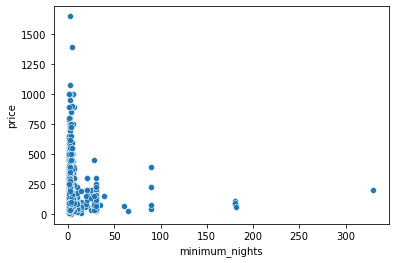

In [99]:
sns.scatterplot(X['minimum_nights'], df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


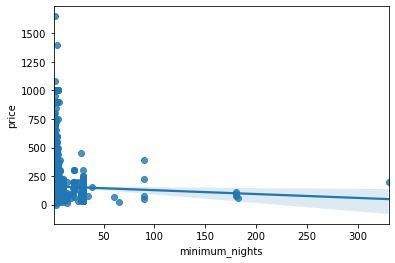

In [100]:
sns.regplot(X['minimum_nights'], df['price'])

In [101]:
X['maximum_nights']

0       1125
1         30
2         28
3         30
4         12
        ... 
3461    1125
3462      21
3463      30
3464    1125
3465    1125
Name: maximum_nights, Length: 3466, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


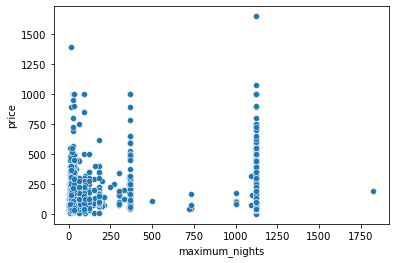

In [102]:
sns.scatterplot(X['maximum_nights'], df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


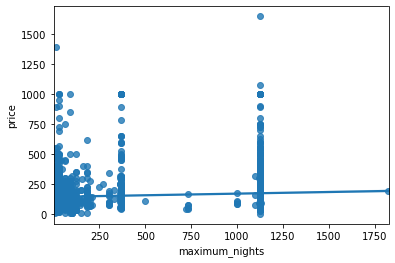

In [103]:
sns.regplot(X['maximum_nights'], df['price'])

Conclusion: Minimum and Maximum Nights don't seem to have a direct effect on the price of the listing.

In [104]:
X['instant_bookable'] = X['instant_bookable'].apply(lambda x : 0 if x == False else 1)
X['instant_bookable']

0       1
1       1
2       0
3       0
4       0
       ..
3461    1
3462    1
3463    1
3464    0
3465    0
Name: instant_bookable, Length: 3466, dtype: int64

In [105]:
X['instant_bookable'].corr(df['price'])

0.10089299437688334

Correlation doesn't indicate the relation quite well. Let's explore more into the distribution & details.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


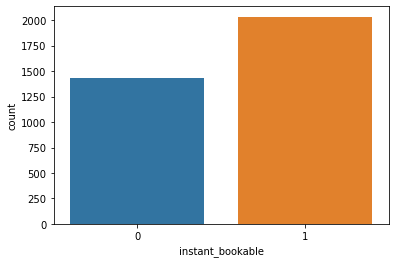

In [106]:
sns.countplot(X['instant_bookable'])

Observation: Although, there is a slight difference of number of bookings which satisfyied "instant_bookable". However, majority of the bookings are instant_bookable. 

Conclusion : Majority of the bookings happen to be instant.


Further Analysis/Assumption: Instant bookings tend be expensive than reserved bookings? Let's verify our statement

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


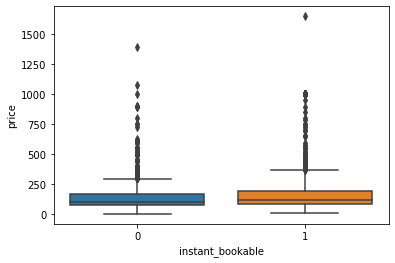

In [107]:
sns.boxplot(X['instant_bookable'], y = df['price'])

Although, readings are quite close to each other, it is right to say that number of instant bookings and reserved are equal. However, the ones which have supported instant bookings are on the higher end if we compare the 75th quantile & Max Value. 

We can support our assumption based on these two factors.

In [108]:
X['cancellation_policy']

0                            strict
1                          moderate
2                          moderate
3                          flexible
4                          flexible
                   ...             
3461                         strict
3462    strict_14_with_grace_period
3463                       flexible
3464                       flexible
3465                       moderate
Name: cancellation_policy, Length: 3466, dtype: object

In [109]:
X['cancellation_policy'].value_counts()

strict_14_with_grace_period    1294
moderate                       1280
flexible                        651
strict                          167
super_strict_30                  67
super_strict_60                   7
Name: cancellation_policy, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


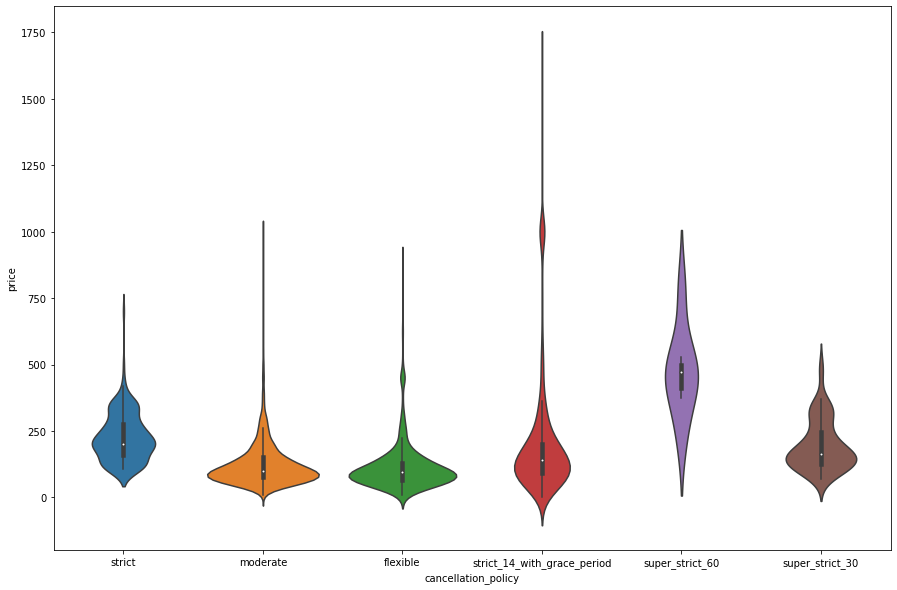

In [110]:
plt.figure(figsize = (15,10))
sns.violinplot(X['cancellation_policy'], df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


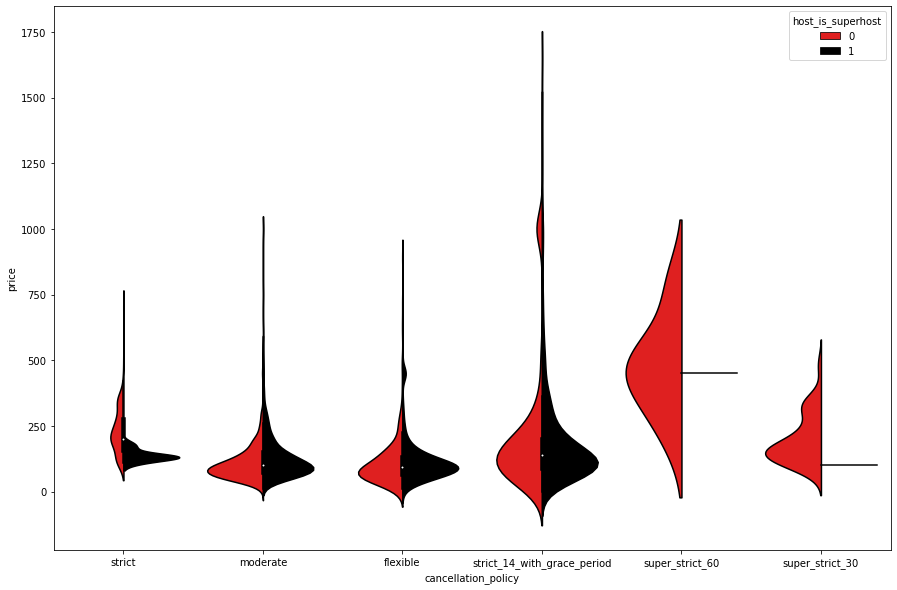

In [111]:
plt.figure(figsize = (15,10))
sns.violinplot(X['cancellation_policy'], df['price'], hue = X['host_is_superhost'], split = True, palette = ['r', 'k'])

Finding : Superhosts don't support "super_strict_60" and "super_strict_30"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


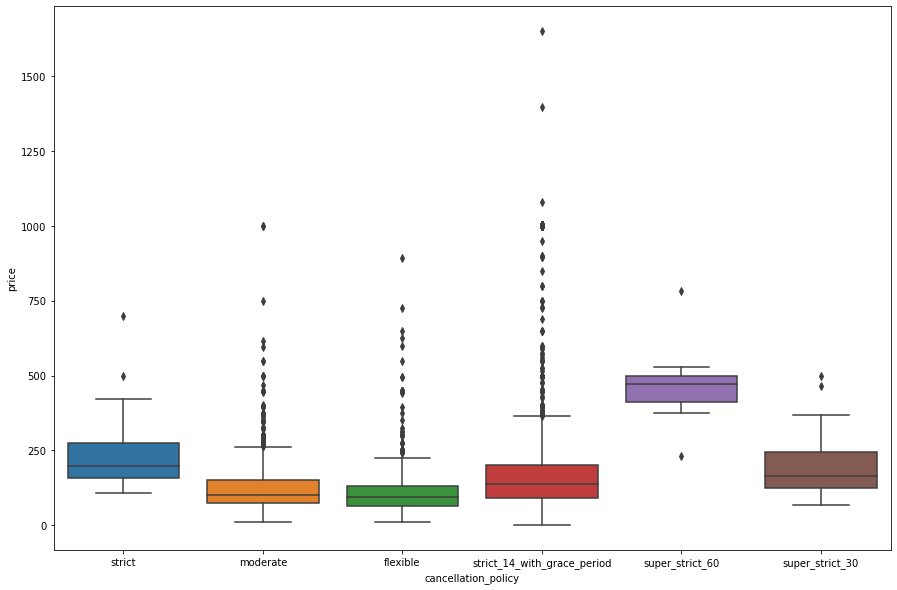

In [112]:
plt.figure(figsize = (15,10))
sns.boxplot(X['cancellation_policy'], df['price'])

Conclusion: 

1. Comparing among strict, moderate & flexible, as obvious it should be, the ones with strict cancellation policy tend to be on the higher range.

2. Comparing Super Strict 60 (atleast 60 days cancellation) & Super Strict 30 (atleast 30 days cancellation), super strict 60 should be on the higher end of prices. And it is.

3. Strict 14 with grace period seems to be the most commonly adapted and preferred cancellation policy among all.

## Data Modelling

In [113]:
test['host_is_superhost'] = test['host_is_superhost'].apply(lambda x : 1 if x == True else 0)

In [114]:
categorical_features = np.where(X.dtypes == object)[0]
categorical_features

array([ 2,  6,  7,  8, 13, 18])

In [115]:
test['host_response_rate'] = test['host_response_rate'].apply(lambda x : float(x[:-1]) / 100)

In [116]:
test['cleaning_fee'] = test['cleaning_fee'].str.replace("$", "")
test['cleaning_fee'] =test['cleaning_fee'].astype(float)

In [117]:
test = test.drop(['X1'], axis = 1)
test

,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,...,has_Well-lit path to entrance,has_Wheelchair accessible,has_Wide clearance to bed,has_Wide clearance to shower,has_Wide doorway,has_Wide entryway,has_Wide hallway clearance,has_Wifi,has_Window guards,has_Wine cooler
0,392779,0,0.90,within an hour,1,True,4,Beacon Hill,Guest suite,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
1,12456183,1,0.86,within a day,1,False,4,Lake City,Guest suite,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
2,1851863,1,1.00,within an hour,1,True,2,Northgate,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
3,23309878,1,1.00,within an hour,2,True,2,Downtown,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
4,10768347,0,1.00,within an hour,1,False,2,Other neighborhoods,House,Private room,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,19350610,0,0.92,within an hour,51,True,3,University District,Apartment,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0
1730,7886656,1,1.00,within an hour,2,True,4,West Seattle,Apartment,Entire home/apt,...,0,1,0,0,0,0,0,1,0,0
1731,3535171,1,1.00,within an hour,2,True,2,Other neighborhoods,House,Private room,...,0,0,0,0,0,0,0,1,0,0
1732,27930170,0,1.00,within an hour,1,False,4,Central Area,Guest suite,Entire home/apt,...,0,0,0,0,0,0,0,1,0,0


In [118]:
test = test.drop(['id'], axis = 1)

In [119]:
categorical_features = np.where(test.dtypes == object)[0]
categorical_features

array([ 2,  6,  7,  8, 13, 18])

## Feature Selection using RF

In [120]:
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=5)

In [121]:
model.fit(X,y, cat_features = categorical_features,plot = False)


0:	learn: 154.2023979	total: 60.4ms	remaining: 2m
1:	learn: 149.7921880	total: 66.9ms	remaining: 1m 6s
2:	learn: 145.5484282	total: 74.3ms	remaining: 49.4s
3:	learn: 141.6678263	total: 80.3ms	remaining: 40.1s
4:	learn: 137.9329349	total: 87.3ms	remaining: 34.8s
5:	learn: 134.4759978	total: 97.1ms	remaining: 32.3s
6:	learn: 131.1701869	total: 105ms	remaining: 29.8s
7:	learn: 128.1054141	total: 111ms	remaining: 27.6s
8:	learn: 125.1344845	total: 117ms	remaining: 25.9s
9:	learn: 122.3655805	total: 124ms	remaining: 24.7s
10:	learn: 119.8136352	total: 130ms	remaining: 23.6s
11:	learn: 117.3158423	total: 136ms	remaining: 22.5s
12:	learn: 114.9102223	total: 142ms	remaining: 21.7s
13:	learn: 112.6949560	total: 149ms	remaining: 21.1s
14:	learn: 110.7143755	total: 155ms	remaining: 20.5s
15:	learn: 108.8120118	total: 161ms	remaining: 19.9s
16:	learn: 107.0463876	total: 167ms	remaining: 19.5s
17:	learn: 105.4136424	total: 174ms	remaining: 19.2s
18:	learn: 103.8800006	total: 181ms	remaining: 18.9s


In [122]:
X.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'guests_included',
       ...
       'has_Well-lit path to entrance', 'has_Wheelchair accessible',
       'has_Wide clearance to bed', 'has_Wide clearance to shower',
       'has_Wide doorway', 'has_Wide entryway', 'has_Wide hallway clearance',
       'has_Wifi', 'has_Window guards', 'has_Wine cooler'],
      dtype='object', length=194)

In [123]:
test.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'guests_included',
       ...
       'has_Well-lit path to entrance', 'has_Wheelchair accessible',
       'has_Wide clearance to bed', 'has_Wide clearance to shower',
       'has_Wide doorway', 'has_Wide entryway', 'has_Wide hallway clearance',
       'has_Wifi', 'has_Window guards', 'has_Wine cooler'],
      dtype='object', length=194)

In [124]:
len(X.columns) == len(test.columns)

True

In [125]:
preds = model.predict(test)

#, cat_features = categorical_features)

In [126]:
preds

array([113.85363178,  99.50539141,  99.58423004, ...,  59.53412785,
       109.19968233, 198.8126817 ])

In [127]:
test.columns

Index(['host_is_superhost', 'host_response_rate', 'host_response_time',
       'host_listings_count', 'host_identity_verified', 'accommodates',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'guests_included',
       ...
       'has_Well-lit path to entrance', 'has_Wheelchair accessible',
       'has_Wide clearance to bed', 'has_Wide clearance to shower',
       'has_Wide doorway', 'has_Wide entryway', 'has_Wide hallway clearance',
       'has_Wifi', 'has_Window guards', 'has_Wine cooler'],
      dtype='object', length=194)

In [128]:
columns_ = list(test.columns)
columns_

['host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'cancellation_policy',
 'has_toilet',
 'has_24-hour check-in',
 'has_Accessible-height bed',
 'has_Accessible-height toilet',
 'has_Air conditioning',
 'has_Amazon Echo',
 'has_BBQ grill',
 'has_Baby bath',
 'has_Baby monitor',
 'has_Babysitter recommendations',
 'has_Balcony',
 'has_Bath towel',
 'has_Bathroom essentials',
 'has_Bathtub',
 'has_Bathtub with bath chair',
 'has_Beach essentials',
 'has_Beach view',
 'has_Beachfront',
 'has_Bed linens',
 'has_Bedroom comforts',
 'has_Body soap',
 'has_Breakfast',
 'has_Breakfast table',
 'has_Building staff',
 'has_Buzzer/wireless intercom',
 'has_Cable TV',
 'has_Carbon monoxide detector',
 'has_

In [129]:
columns_.append('Price')

In [130]:
pd.DataFrame(np.c_[test, preds], columns = columns_).to_csv("Predictions1_CatBoost.csv", index = False)

### Method -2 

Feature Selection

Remove "Minimum Nights" & "Maximum Nights" features. These features don't seem to have a direct influence on the price of the listing.

In [131]:
X.drop(['minimum_nights', 'maximum_nights'], axis = 1, inplace = True)

In [132]:
test.drop(['minimum_nights', 'maximum_nights'], axis = 1, inplace= True)

In [133]:
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=5)

In [134]:
categorical_features = np.where(test.dtypes == object)[0]
categorical_features

array([ 2,  6,  7,  8, 13, 16])

In [135]:
categorical_features = np.where(X.dtypes == object)[0]
categorical_features

array([ 2,  6,  7,  8, 13, 16])

In [136]:
model.fit(X,y, cat_features = categorical_features,plot = False)


0:	learn: 154.0734045	total: 11.2ms	remaining: 22.4s
1:	learn: 149.7002856	total: 18.2ms	remaining: 18.2s
2:	learn: 145.6302932	total: 25.3ms	remaining: 16.9s
3:	learn: 141.7821226	total: 31.8ms	remaining: 15.8s
4:	learn: 138.5451243	total: 38.8ms	remaining: 15.5s
5:	learn: 135.2318623	total: 45.4ms	remaining: 15.1s
6:	learn: 131.9019770	total: 51.9ms	remaining: 14.8s
7:	learn: 128.7707228	total: 59.4ms	remaining: 14.8s
8:	learn: 125.7570407	total: 65.9ms	remaining: 14.6s
9:	learn: 122.8517126	total: 72.9ms	remaining: 14.5s
10:	learn: 120.2546013	total: 79.4ms	remaining: 14.4s
11:	learn: 117.9541649	total: 85.8ms	remaining: 14.2s
12:	learn: 115.6287862	total: 92.3ms	remaining: 14.1s
13:	learn: 113.4300888	total: 99.1ms	remaining: 14.1s
14:	learn: 111.5231742	total: 105ms	remaining: 13.9s
15:	learn: 109.8560277	total: 112ms	remaining: 13.8s
16:	learn: 108.0030473	total: 119ms	remaining: 13.8s
17:	learn: 106.2257785	total: 125ms	remaining: 13.7s
18:	learn: 104.6094732	total: 132ms	remain

In [137]:
preds = model.predict(test)

In [138]:
columns_ = list(test.columns)
columns_.append('Price')
pd.DataFrame(np.c_[test, preds], columns = columns_).to_csv("Predictions2_FeatureSelection_CatBoost.csv", index = False)

### Method -3 

RandomForest Regressor

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Columns: 192 entries, host_is_superhost to has_Wine cooler
dtypes: float64(3), int64(183), object(6)
memory usage: 5.1+ MB


In [140]:
X.columns[categorical_features]

Index(['host_response_time', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy'],
      dtype='object')

In [141]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 300, criterion = 'mse', n_jobs = -1)

Let's deal with the categorical variables so as to use RFRegressor

In [142]:
cat_columns = list(X.select_dtypes(include=['object']).columns)

In [143]:
cat_columns

['host_response_time',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

Converting categorical columns to dummies

In [144]:
for col in  cat_columns:
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_',

                                                         drop_first=True)], axis=1)

In [145]:
list(X.columns)

['host_is_superhost',
 'host_response_rate',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'instant_bookable',
 'has_toilet',
 'has_24-hour check-in',
 'has_Accessible-height bed',
 'has_Accessible-height toilet',
 'has_Air conditioning',
 'has_Amazon Echo',
 'has_BBQ grill',
 'has_Baby bath',
 'has_Baby monitor',
 'has_Babysitter recommendations',
 'has_Balcony',
 'has_Bath towel',
 'has_Bathroom essentials',
 'has_Bathtub',
 'has_Bathtub with bath chair',
 'has_Beach essentials',
 'has_Beach view',
 'has_Beachfront',
 'has_Bed linens',
 'has_Bedroom comforts',
 'has_Body soap',
 'has_Breakfast',
 'has_Breakfast table',
 'has_Building staff',
 'has_Buzzer/wireless intercom',
 'has_Cable TV',
 'has_Carbon monoxide detector',
 'has_Cat(s)',
 'has_Ceiling fan',
 'has_Central air conditioning',
 'has_Changing table',
 'has_Children’s books and toys',
 'has_Children’s dinnerware',
 'has_Cleaning

Similar transformation for test dataset

In [146]:
for col in  cat_columns:
    test = pd.concat([test.drop(col, axis=1), pd.get_dummies(test[col], prefix=col, prefix_sep='_',

                                                         drop_first=True)], axis=1)

In [147]:
list(test.columns)

['host_is_superhost',
 'host_response_rate',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'instant_bookable',
 'has_toilet',
 'has_24-hour check-in',
 'has_Accessible-height bed',
 'has_Accessible-height toilet',
 'has_Air conditioning',
 'has_Amazon Echo',
 'has_BBQ grill',
 'has_Baby bath',
 'has_Baby monitor',
 'has_Babysitter recommendations',
 'has_Balcony',
 'has_Bath towel',
 'has_Bathroom essentials',
 'has_Bathtub',
 'has_Bathtub with bath chair',
 'has_Beach essentials',
 'has_Beach view',
 'has_Beachfront',
 'has_Bed linens',
 'has_Bedroom comforts',
 'has_Body soap',
 'has_Breakfast',
 'has_Breakfast table',
 'has_Building staff',
 'has_Buzzer/wireless intercom',
 'has_Cable TV',
 'has_Carbon monoxide detector',
 'has_Cat(s)',
 'has_Ceiling fan',
 'has_Central air conditioning',
 'has_Changing table',
 'has_Children’s books and toys',
 'has_Children’s dinnerware',
 'has_Cleaning

In [148]:
print(len(X.columns))
print(len(test.columns))

240
236


In [149]:
for x in list(X.columns):
    if x not in list(test.columns):
        print(x)

property_type_Boutique hotel
property_type_Farm stay
property_type_Hostel
property_type_In-law
property_type_Resort
property_type_Yurt


In [150]:
for x in list(test.columns):
    if x not in list(X.columns):
        print(x)

property_type_Treehouse
bed_type_Couch


In [151]:
X['property_type_Treehouse'] = 0
X['bed_type_Couch'] = 0

In [152]:
test['property_type_Boutique hotel'] = 0
test['property_type_Farm stay'] = 0
test['property_type_Hostel'] = 0
test['property_type_In-law'] = 0
test['property_type_Resort'] = 0
test['property_type_Yurt'] = 0

In [153]:
len(list(X.columns)) == len(list(test.columns))

True

In [154]:
forest.fit(X,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [155]:
preds_forest = forest.predict(test)

In [156]:
preds_forest

array([152.585     ,  76.66222222, 108.08144444, ...,  70.21333333,
       128.76333333, 197.73666667])

In [157]:
columns_ = list(test.columns)
columns_.append('Price')
pd.DataFrame(np.c_[test, preds_forest], columns = columns_).to_csv("Predictions3_RandomForestRegressor.csv", index = False)

#### Method -4 

Boosting Algorithms

XGBoost

In [158]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
X.columns

Index(['host_is_superhost', 'host_response_rate', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'guests_included',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       ...
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'property_type_Treehouse',
       'bed_type_Couch'],
      dtype='object', length=242)

In [160]:
preds_xgb = xgb.predict(test[X.columns])

In [161]:
columns_ = list(test.columns)
columns_.append('Price')
pd.DataFrame(np.c_[test, preds_xgb], columns = columns_).to_csv("Predictions4_XGBoost.csv", index = False)

## Feature Selection using Statistical Methods

Univariate

SelectKBest, chi2

In [162]:
X.columns

Index(['host_is_superhost', 'host_response_rate', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'guests_included',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       ...
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'property_type_Treehouse',
       'bed_type_Couch'],
      dtype='object', length=242)

In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Columns: 242 entries, host_is_superhost to bed_type_Couch
dtypes: float64(3), int64(185), uint8(54)
memory usage: 5.1 MB


In [164]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k = 100)
chi_selector.fit(X_norm, y)

SelectKBest(k=100, score_func=<function chi2 at 0x7f47ba321050>)

In [165]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(chi_feature)

print(len(chi_feature))

['host_listings_count', 'has_toilet', 'has_24-hour check-in', 'has_Accessible-height toilet', 'has_Air conditioning', 'has_BBQ grill', 'has_Baby bath', 'has_Baby monitor', 'has_Babysitter recommendations', 'has_Balcony', 'has_Bath towel', 'has_Bathtub', 'has_Bathtub with bath chair', 'has_Beach essentials', 'has_Body soap', 'has_Breakfast', 'has_Building staff', 'has_Buzzer/wireless intercom', 'has_Cable TV', 'has_Ceiling fan', 'has_Children’s books and toys', 'has_Children’s dinnerware', 'has_Convection oven', 'has_Crib', 'has_DVD player', 'has_Day bed', 'has_Disabled parking spot', 'has_Dishwasher', 'has_Doorman', 'has_Elevator', 'has_En suite bathroom', 'has_Ethernet connection', 'has_Fireplace guards', 'has_Flat path to front door', 'has_Formal dining area', 'has_Full kitchen', 'has_Game console', 'has_Gas oven', 'has_Gym', 'has_Hammock', 'has_Heated towel rack', 'has_High chair', 'has_Host greets you', 'has_Hot tub', 'has_Hot water kettle', 'has_Indoor fireplace', 'has_Internet', 

Pearson Correlation

## Feature Selection using Wrapper Methods

Forward Selection
Backward Selection
Exhaustive Feature Selection

Recursive Feature Elimination

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator = LogisticRegression(), n_features_to_select = 100, step = 10, verbose = 5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 242 features.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Fitting estimator with 232 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 222 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 212 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 202 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 192 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 182 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 172 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 162 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 152 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 142 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 132 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 122 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 112 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting estimator with 102 features.


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10,
    verbose=5)

In [167]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

In [168]:
print(rfe_feature)

['host_is_superhost', 'host_identity_verified', 'guests_included', 'bedrooms', 'cleaning_fee', 'instant_bookable', 'has_24-hour check-in', 'has_Air conditioning', 'has_BBQ grill', 'has_Bathroom essentials', 'has_Bathtub', 'has_Bed linens', 'has_Breakfast', 'has_Buzzer/wireless intercom', 'has_Cable TV', 'has_Carbon monoxide detector', 'has_Children’s books and toys', 'has_Children’s dinnerware', 'has_Coffee maker', 'has_Crib', 'has_Dishwasher', 'has_Dog(s)', 'has_Dryer', 'has_Elevator', 'has_Essentials', 'has_Ethernet connection', 'has_Extra pillows and blankets', 'has_Family/kid friendly', 'has_Fire extinguisher', 'has_First aid kit', 'has_Flat path to front door', 'has_Free parking on premises', 'has_Free street parking', 'has_Full kitchen', 'has_Garden or backyard', 'has_Gym', 'has_Hair dryer', 'has_Hangers', 'has_Heating', 'has_High chair', 'has_Host greets you', 'has_Hot tub', 'has_Hot water', 'has_Indoor fireplace', 'has_Internet', 'has_Iron', 'has_Keypad', 'has_Kitchen', 'has_La

## Feature Selection using Model Based Methods

In [169]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


embeded_lr_selector = SelectFromModel(LogisticRegression(penalty = 'l2'), '1.25*median')
embeded_lr_selector.fit(X_norm, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=1.25*median as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG

SelectFromModel(estimator=LogisticRegression(), threshold='1.25*median')

In [170]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(embeded_lr_feature), 'selected features')

['host_is_superhost', 'host_identity_verified', 'guests_included', 'bedrooms', 'cleaning_fee', 'instant_bookable', 'has_24-hour check-in', 'has_Air conditioning', 'has_BBQ grill', 'has_Bathtub', 'has_Bed linens', 'has_Breakfast', 'has_Buzzer/wireless intercom', 'has_Cable TV', 'has_Carbon monoxide detector', 'has_Children’s books and toys', 'has_Children’s dinnerware', 'has_Coffee maker', 'has_Cooking basics', 'has_Dishes and silverware', 'has_Dishwasher', 'has_Dog(s)', 'has_Dryer', 'has_Elevator', 'has_Essentials', 'has_Ethernet connection', 'has_Extra pillows and blankets', 'has_Family/kid friendly', 'has_Fire extinguisher', 'has_First aid kit', 'has_Flat path to front door', 'has_Free parking on premises', 'has_Free street parking', 'has_Garden or backyard', 'has_Gym', 'has_Hair dryer', 'has_Hangers', 'has_Heating', 'has_High chair', 'has_Host greets you', 'has_Hot tub', 'has_Hot water', 'has_Indoor fireplace', 'has_Internet', 'has_Iron', 'has_Keypad', 'has_Kitchen', 'has_Lake acces

Using RF

In [171]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [172]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [173]:
embeded_rf_feature

['host_is_superhost',
 'host_response_rate',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'instant_bookable',
 'has_24-hour check-in',
 'has_Air conditioning',
 'has_BBQ grill',
 'has_Bathtub',
 'has_Bed linens',
 'has_Breakfast',
 'has_Building staff',
 'has_Buzzer/wireless intercom',
 'has_Cable TV',
 'has_Carbon monoxide detector',
 'has_Cat(s)',
 'has_Children’s books and toys',
 'has_Coffee maker',
 'has_Cooking basics',
 'has_Dishes and silverware',
 'has_Dishwasher',
 'has_Dog(s)',
 'has_Dryer',
 'has_Elevator',
 'has_Ethernet connection',
 'has_Extra pillows and blankets',
 'has_Family/kid friendly',
 'has_Fire extinguisher',
 'has_First aid kit',
 'has_Flat path to front door',
 'has_Free parking on premises',
 'has_Free street parking',
 'has_Full kitchen',
 'has_Garden or backyard',
 'has_Gym',
 'has_Hair dryer',
 'has_Hangers',
 'has_Heating',
 'has_High chair',
 'has_Host greet

LightGBM

In [174]:
!pip install -q --upgrade 'lightgbm>=3.0.0'

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [175]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier


In [176]:
lgbc = LGBMClassifier(n_estimators = 500, learning_rate = 0.05, num_leaves = 32, colsample_bytree = 0.2, reg_alpha= 3, reg_lambda = 1, min_split_gain = 0.01, min_child_weight = 40)

In [177]:
embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [178]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()

In [179]:
embeded_lgb_feature

['host_is_superhost',
 'host_response_rate',
 'host_listings_count',
 'host_identity_verified',
 'accommodates',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'instant_bookable',
 'has_toilet',
 'has_24-hour check-in',
 'has_Accessible-height bed',
 'has_Accessible-height toilet',
 'has_Air conditioning',
 'has_Amazon Echo',
 'has_BBQ grill',
 'has_Baby bath',
 'has_Baby monitor',
 'has_Babysitter recommendations',
 'has_Balcony',
 'has_Bath towel',
 'has_Bathroom essentials',
 'has_Bathtub',
 'has_Bathtub with bath chair',
 'has_Beach essentials',
 'has_Beach view',
 'has_Beachfront',
 'has_Bed linens',
 'has_Bedroom comforts',
 'has_Body soap',
 'has_Breakfast',
 'has_Breakfast table',
 'has_Building staff',
 'has_Buzzer/wireless intercom',
 'has_Cable TV',
 'has_Carbon monoxide detector',
 'has_Cat(s)',
 'has_Ceiling fan',
 'has_Central air conditioning',
 'has_Changing table',
 'has_Children’s books and toys',
 'has_Children’s dinnerware',
 'has_Cleaning

RF Bestt Features

In [180]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X,y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [181]:
scores = []
for i in range(100):
    scores.append((clf.feature_importances_[i],X.columns[i]))
        
print(scores)

[(0.011992883553838594, 'host_is_superhost'), (0.01031193799054256, 'host_response_rate'), (0.032679971054590654, 'host_listings_count'), (0.012663812930198692, 'host_identity_verified'), (0.02747297460760946, 'accommodates'), (0.021644952153332335, 'guests_included'), (0.015833575757539794, 'bathrooms'), (0.023343082809015495, 'bedrooms'), (0.020537317829558043, 'beds'), (0.041745495872480755, 'cleaning_fee'), (0.014868225737007947, 'instant_bookable'), (0.001700707794707871, 'has_toilet'), (0.00972779269618213, 'has_24-hour check-in'), (0.0018801920113552418, 'has_Accessible-height bed'), (0.0016335760921177766, 'has_Accessible-height toilet'), (0.013866188956099002, 'has_Air conditioning'), (0.00016404281991934773, 'has_Amazon Echo'), (0.007392909067262636, 'has_BBQ grill'), (0.0009147493890183697, 'has_Baby bath'), (0.0006842924970138429, 'has_Baby monitor'), (0.0016916502161258243, 'has_Babysitter recommendations'), (0.0003650107807611529, 'has_Balcony'), (0.0010937988536872847, '

## Dimensionality Reduction Methods (PCA)

# Summary

Comparitive Study of the methods

# Notebook in Making...